✓ Library berhasil diimport

PILIHAN DATASET:
1. Iris Dataset (Klasifikasi Bunga)
2. Wine Dataset (Klasifikasi Wine)
3. Breast Cancer Dataset (Deteksi Kanker)

✓ Dataset dipilih: Iris Dataset
✓ Jumlah data: 150 baris
✓ Jumlah fitur: 4
✓ Kelas target: ['setosa' 'versicolor' 'virginica']

EXPLORATORY DATA ANALYSIS (EDA)

📊 Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB
None

📊 5 Data Pertama:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4        

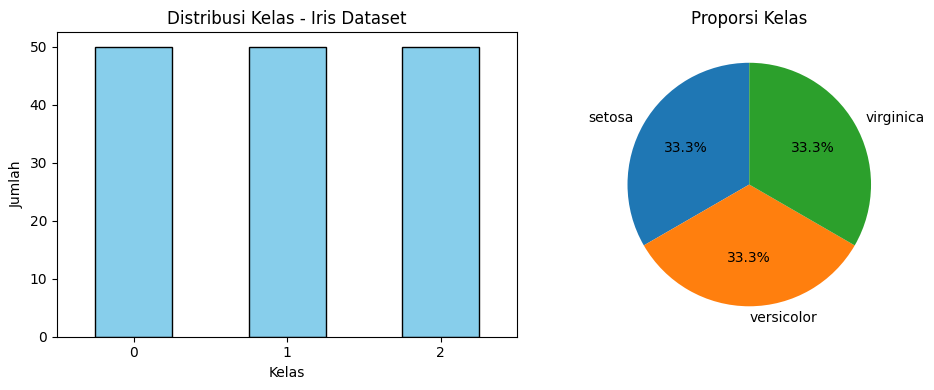


📊 Missing Values:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64


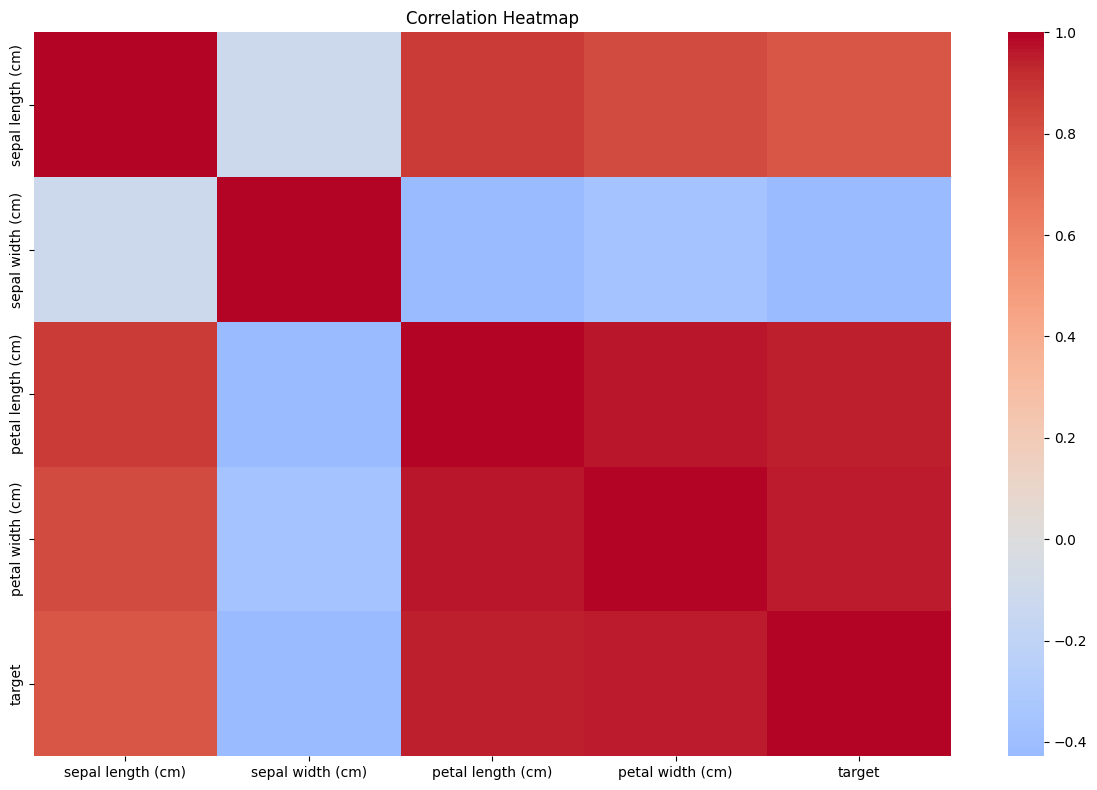


PREPROCESSING DATA
✓ Data training: 120 samples
✓ Data testing: 30 samples
✓ Standardisasi selesai

TRAINING MODELS

🔄 Training Logistic Regression...
✓ Logistic Regression selesai - Accuracy: 0.9333

🔄 Training Decision Tree...
✓ Decision Tree selesai - Accuracy: 0.9333

🔄 Training K-Nearest Neighbors...
✓ K-Nearest Neighbors selesai - Accuracy: 0.9333

🔄 Training Support Vector Machine...
✓ Support Vector Machine selesai - Accuracy: 0.9667

HASIL EVALUASI MODEL

📊 Ringkasan Performa Model:
                 Model  Accuracy  Precision   Recall  F1-Score
   Logistic Regression  0.933333   0.933333 0.933333  0.933333
         Decision Tree  0.933333   0.933333 0.933333  0.933333
   K-Nearest Neighbors  0.933333   0.944444 0.933333  0.932660
Support Vector Machine  0.966667   0.969697 0.966667  0.966583


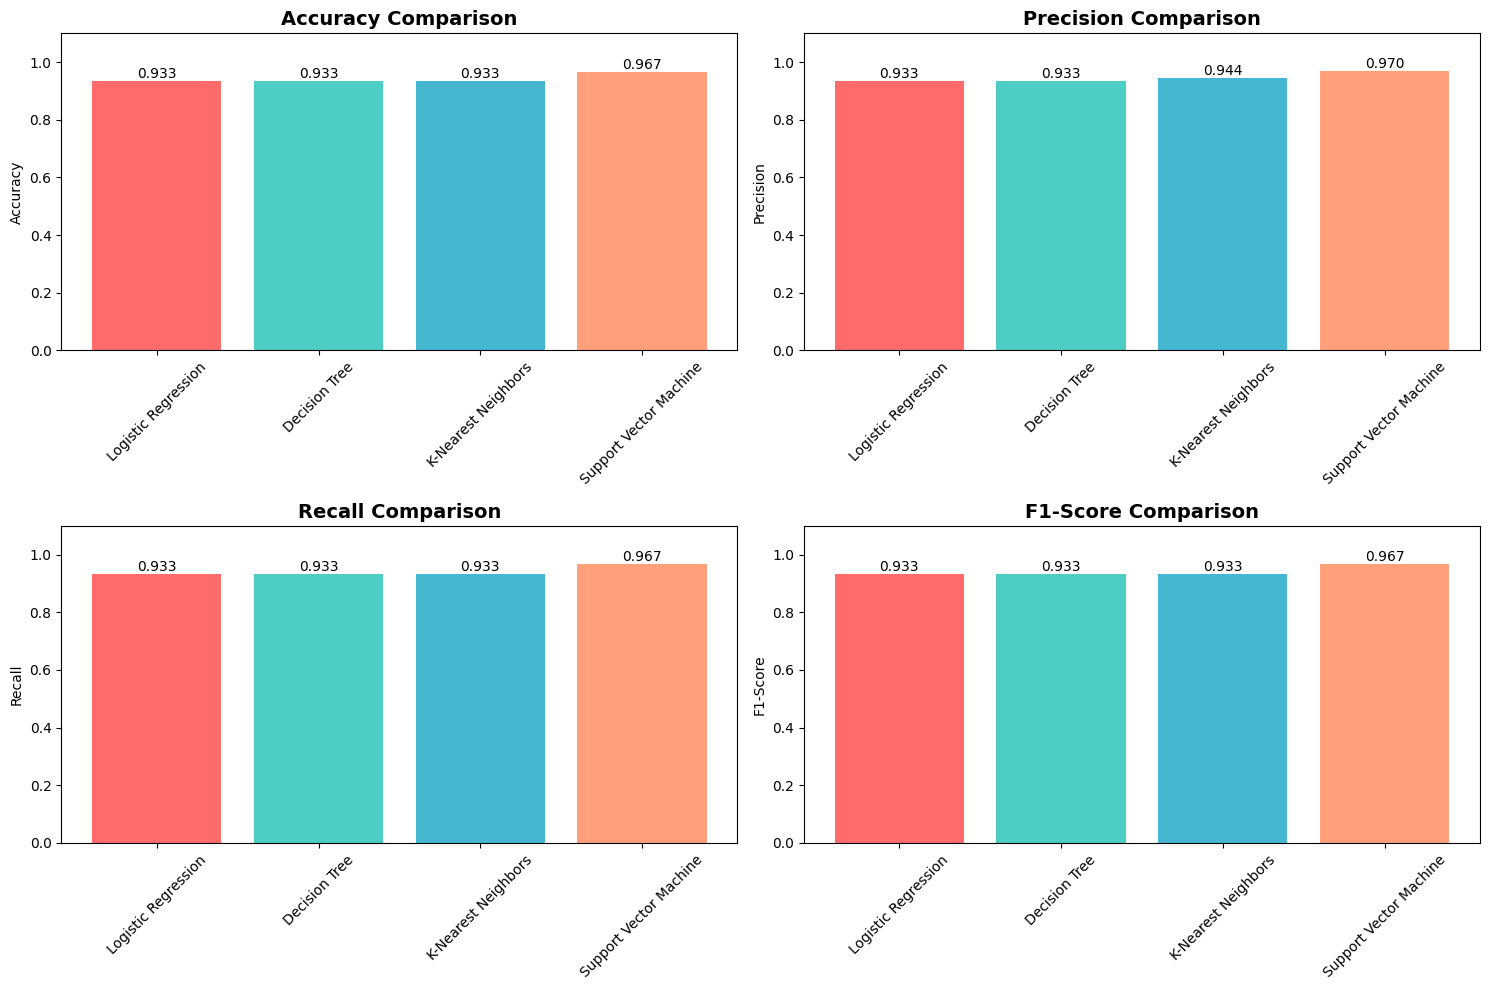


CONFUSION MATRIX


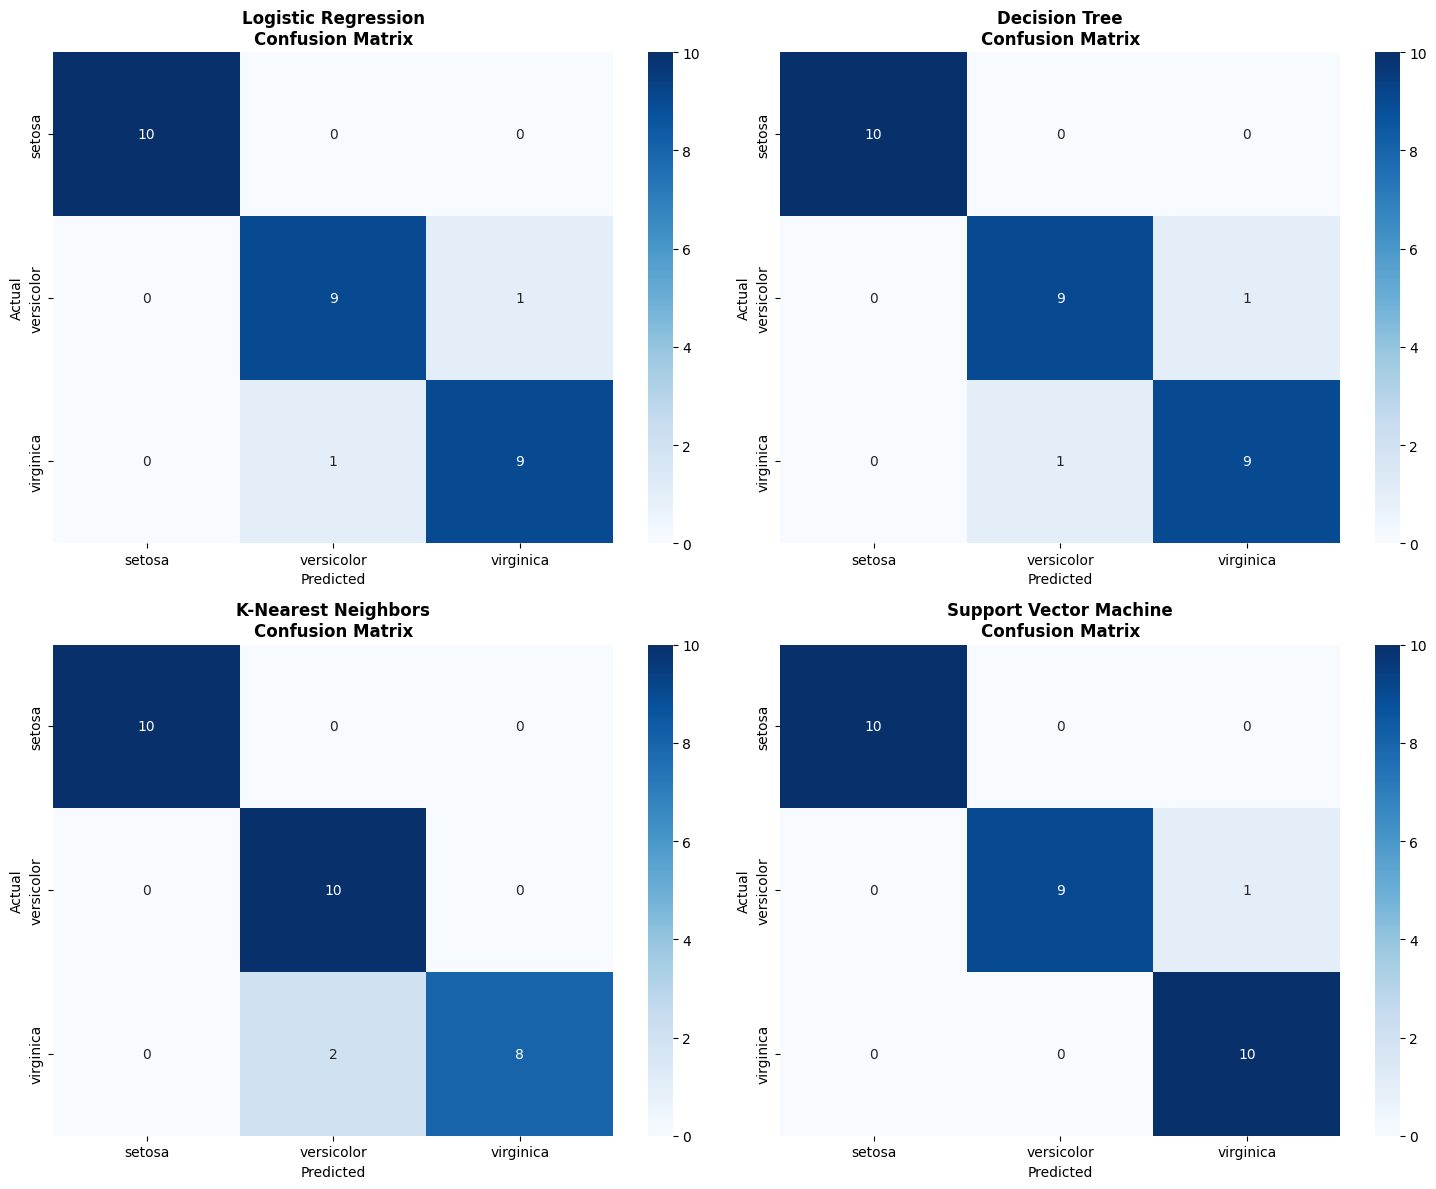


KESIMPULAN

🏆 Model Terbaik: Support Vector Machine
📊 Accuracy: 0.9667 (96.67%)
📊 Precision: 0.9697
📊 Recall: 0.9667
📊 F1-Score: 0.9666

ANALISIS SELESAI!

💡 Langkah selanjutnya:
1. Simpan notebook ini (.ipynb)
2. Download sebagai .py jika diperlukan
3. Upload ke GitHub repository
4. Buat laporan (3 halaman) dengan hasil di atas


In [ ]:
# ========================================
# TUGAS UTS PEMROGRAMAN WEB
# Model Klasifikasi Machine Learning
# ========================================

# 1. IMPORT LIBRARY
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.datasets import load_iris, load_wine, load_breast_cancer
import warnings
warnings.filterwarnings('ignore')

print("✓ Library berhasil diimport\n")

# ========================================
# 2. PILIH DATASET
# ========================================
print("=" * 50)
print("PILIHAN DATASET:")
print("=" * 50)
print("1. Iris Dataset (Klasifikasi Bunga)")
print("2. Wine Dataset (Klasifikasi Wine)")
print("3. Breast Cancer Dataset (Deteksi Kanker)")
print("=" * 50)

# GANTI ANGKA DI BAWAH INI SESUAI PILIHAN (1, 2, atau 3)
pilihan_dataset = 1  # ← UBAH SESUAI PILIHAN ANDA

# Load dataset berdasarkan pilihan
if pilihan_dataset == 1:
    data = load_iris()
    dataset_name = "Iris Dataset"
elif pilihan_dataset == 2:
    data = load_wine()
    dataset_name = "Wine Dataset"
elif pilihan_dataset == 3:
    data = load_breast_cancer()
    dataset_name = "Breast Cancer Dataset"
else:
    raise ValueError("Pilihan tidak valid! Gunakan 1, 2, atau 3")

# Buat DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

print(f"\n✓ Dataset dipilih: {dataset_name}")
print(f"✓ Jumlah data: {len(df)} baris")
print(f"✓ Jumlah fitur: {len(data.feature_names)}")
print(f"✓ Kelas target: {data.target_names}\n")

# ========================================
# 3. EXPLORATORY DATA ANALYSIS (EDA)
# ========================================
print("=" * 50)
print("EXPLORATORY DATA ANALYSIS (EDA)")
print("=" * 50)

# Info dataset
print("\n📊 Informasi Dataset:")
print(df.info())

print("\n📊 5 Data Pertama:")
print(df.head())

print("\n📊 Statistik Deskriptif:")
print(df.describe())

print("\n📊 Distribusi Kelas Target:")
print(df['target'].value_counts())

# Visualisasi distribusi target
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
df['target'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title(f'Distribusi Kelas - {dataset_name}')
plt.xlabel('Kelas')
plt.ylabel('Jumlah')
plt.xticks(rotation=0)

plt.subplot(1, 2, 2)
plt.pie(df['target'].value_counts(), labels=data.target_names, autopct='%1.1f%%', startangle=90)
plt.title('Proporsi Kelas')

plt.tight_layout()
plt.show()

# Cek missing values
print("\n📊 Missing Values:")
print(df.isnull().sum())

# Correlation heatmap (hanya untuk fitur numerik)
plt.figure(figsize=(12, 8))
correlation = df.corr()
sns.heatmap(correlation, annot=False, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

# ========================================
# 4. PREPROCESSING & SPLIT DATA
# ========================================
print("\n" + "=" * 50)
print("PREPROCESSING DATA")
print("=" * 50)

# Pisahkan fitur dan target
X = df.drop('target', axis=1)
y = df['target']

# Split data: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"✓ Data training: {len(X_train)} samples")
print(f"✓ Data testing: {len(X_test)} samples")

# Standardisasi fitur
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("✓ Standardisasi selesai")

# ========================================
# 5. TRAINING MODEL
# ========================================
print("\n" + "=" * 50)
print("TRAINING MODELS")
print("=" * 50)

# Dictionary untuk menyimpan model
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'Support Vector Machine': SVC(kernel='rbf', probability=True, random_state=42)
}

# Dictionary untuk menyimpan hasil
results = {}

# Training setiap model
for name, model in models.items():
    print(f"\n🔄 Training {name}...")
    model.fit(X_train_scaled, y_train)

    # Prediksi
    y_pred = model.predict(X_test_scaled)

    # Evaluasi
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    results[name] = {
        'model': model,
        'y_pred': y_pred,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1
    }

    print(f"✓ {name} selesai - Accuracy: {accuracy:.4f}")

# ========================================
# 6. EVALUASI MODEL
# ========================================
print("\n" + "=" * 50)
print("HASIL EVALUASI MODEL")
print("=" * 50)

# Tampilkan hasil dalam tabel
results_df = pd.DataFrame({
    'Model': list(results.keys()),
    'Accuracy': [results[m]['accuracy'] for m in results.keys()],
    'Precision': [results[m]['precision'] for m in results.keys()],
    'Recall': [results[m]['recall'] for m in results.keys()],
    'F1-Score': [results[m]['f1_score'] for m in results.keys()]
})

print("\n📊 Ringkasan Performa Model:")
print(results_df.to_string(index=False))

# Visualisasi perbandingan model
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

metrics = ['accuracy', 'precision', 'recall', 'f1_score']
metric_names = ['Accuracy', 'Precision', 'Recall', 'F1-Score']

for idx, (metric, metric_name) in enumerate(zip(metrics, metric_names)):
    ax = axes[idx // 2, idx % 2]
    values = [results[m][metric] for m in results.keys()]
    bars = ax.bar(results.keys(), values, color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A'])
    ax.set_title(f'{metric_name} Comparison', fontsize=14, fontweight='bold')
    ax.set_ylabel(metric_name)
    ax.set_ylim([0, 1.1])
    ax.tick_params(axis='x', rotation=45)

    # Tambahkan nilai di atas bar
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.3f}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

# ========================================
# CONFUSION MATRIX
# ========================================
print("\n" + "=" * 50)
print("CONFUSION MATRIX")
print("=" * 50)

fig, axes = plt.subplots(2, 2, figsize=(15, 12))

for idx, (name, result) in enumerate(results.items()):
    ax = axes[idx // 2, idx % 2]
    cm = confusion_matrix(y_test, result['y_pred'])

    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax,
                xticklabels=data.target_names,
                yticklabels=data.target_names)
    ax.set_title(f'{name}\nConfusion Matrix', fontsize=12, fontweight='bold')
    ax.set_ylabel('Actual')
    ax.set_xlabel('Predicted')

plt.tight_layout()
plt.show()

# ========================================
# ROC CURVE (jika binary classification)
# ========================================
if len(data.target_names) == 2:
    print("\n" + "=" * 50)
    print("ROC CURVE")
    print("=" * 50)

    plt.figure(figsize=(10, 8))

    for name, result in results.items():
        model = result['model']
        if hasattr(model, 'predict_proba'):
            y_proba = model.predict_proba(X_test_scaled)[:, 1]
            fpr, tpr, _ = roc_curve(y_test, y_proba)
            roc_auc = auc(fpr, tpr)
            plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.3f})', linewidth=2)

    plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
    plt.xlabel('False Positive Rate', fontsize=12)
    plt.ylabel('True Positive Rate', fontsize=12)
    plt.title('ROC Curve Comparison', fontsize=14, fontweight='bold')
    plt.legend(loc='lower right')
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

# ========================================
# KESIMPULAN
# ========================================
print("\n" + "=" * 50)
print("KESIMPULAN")
print("=" * 50)

best_model_name = max(results, key=lambda x: results[x]['accuracy'])
best_accuracy = results[best_model_name]['accuracy']

print(f"\n🏆 Model Terbaik: {best_model_name}")
print(f"📊 Accuracy: {best_accuracy:.4f} ({best_accuracy*100:.2f}%)")
print(f"📊 Precision: {results[best_model_name]['precision']:.4f}")
print(f"📊 Recall: {results[best_model_name]['recall']:.4f}")
print(f"📊 F1-Score: {results[best_model_name]['f1_score']:.4f}")

print("\n" + "=" * 50)
print("ANALISIS SELESAI!")
print("=" * 50)
print("\n💡 Langkah selanjutnya:")
print("1. Simpan notebook ini (.ipynb)")
print("2. Download sebagai .py jika diperlukan")
print("3. Upload ke GitHub repository")
print("4. Buat laporan (3 halaman) dengan hasil di atas")
print("=" * 50)